# Desafio 3

## Importando

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def ColabOuCode():
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(
            '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/fraud_detection_dataset.csv'
        )
    except:
        df = pd.read_csv('./data/fraud_detection_dataset.csv', nrows=10000, verbose=False)
    
    return df


In [2]:
df = ColabOuCode()

In [3]:
df.shape

(10000, 11)

In [4]:
print(df.info(verbose=True))
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB
None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
df = df.rename(columns={
        'step':'HorasInicio',
        'type':'TipoTransacao',
        'amount':'ValorTransacao',
        'nameOrig':'NomOrigem',
        'oldbalanceOrig':'oldBalancoOrigem',
        'newbalanceOrig':'newBalancoOrigem',
        'nameDest':'NomeDestino',
        'oldbalanceDest':'oldBalancoDestino',
        'newbalanceDest':'newBalancoDestino',
        'isFraud':'Fraude',
        'isFlaggedFraud':'SinalFraude',
        }
    )

pass

In [6]:
pd.set_option('display.max_columns', 11)
df.head()

,HorasInicio,TipoTransacao,ValorTransacao,NomOrigem,oldbalanceOrg,newBalancoOrigem,NomeDestino,oldBalancoDestino,newBalancoDestino,Fraude,SinalFraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe(percentiles=(0.9,0.95,0.99))

,HorasInicio,ValorTransacao,oldbalanceOrg,newBalancoOrigem,oldBalancoDestino,newBalancoDestino,Fraude,SinalFraude
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.0
mean,4.178900,1.035467e+05,8.939330e+05,9.152741e+05,9.342758e+05,1.096606e+06,0.006800,0.0
std,2.479821,2.663072e+05,2.135683e+06,2.181428e+06,2.676340e+06,3.014496e+06,0.082185,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,1.285874e+04,2.137556e+04,1.034994e+04,0.000000e+00,0.000000e+00,0.000000,0.0
90%,7.000000,2.844522e+05,3.873542e+06,4.022625e+06,2.492924e+06,3.564338e+06,0.000000,0.0
95%,7.000000,4.301319e+05,6.400517e+06,6.530802e+06,6.599221e+06,7.488672e+06,0.000000,0.0
99%,7.000000,1.168740e+06,9.419003e+06,9.537812e+06,1.443719e+07,1.594559e+07,0.000000,0.0
max,7.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.951612e+07,1.916920e+07,1.000000,0.0


In [8]:
df.isnull().sum()

HorasInicio          0
TipoTransacao        0
ValorTransacao       0
NomOrigem            0
oldbalanceOrg        0
newBalancoOrigem     0
NomeDestino          0
oldBalancoDestino    0
newBalancoDestino    0
Fraude               0
SinalFraude          0
dtype: int64

KeyboardInterrupt: 

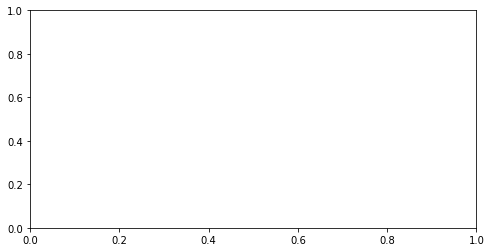

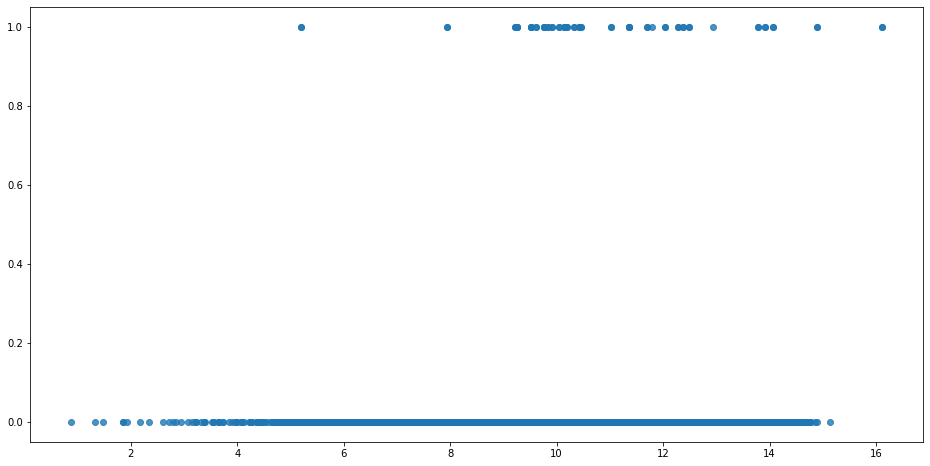

In [10]:
fig = plt.subplots(figsize=(8,4))

'''for i in df.TipoTransacao.unique():
    sns.regplot(
        x=df['ValorTransacao'][df.TipoTransacao == i][df.Fraude == 1],
        y=df['Fraude'][df.TipoTransacao == i][df.Fraude == 1],
        logistic=True
    )
    plt.show()
'''

fig = plt.subplots(figsize=(16,8))

df['ValorTransacao'] = np.log(df['ValorTransacao'])

#for i in df.TipoTransacao.unique():
sns.regplot(
    x=df['ValorTransacao'],
    y=df['Fraude'],
    logistic=True
)
plt.show()